
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:
""" 
import required packages
"""

import os
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import polsartools as pst
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module='pyproj')


In [2]:
""" 

Function to display images

"""

def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax

    num_images = len(filenames)

    if num_images == 1:
        # Single image case
        data = pst.read_rst(filenames[0])
        data[data==0]=np.nan
        vmin, vmax = compute_vmin_vmax(data)

        fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filenames[0]))
        fig.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()
    else:
        # Multiple image case
        ncols = min(max_cols, num_images)
        nrows = int(np.ceil(num_images / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
        axes = np.array(axes).reshape(-1)  # Flatten in case it's a 2D grid

        for i, filename in enumerate(filenames):
            data = pst.read_rst(filename)
            data[data==0]=np.nan
            vmin, vmax = compute_vmin_vmax(data)
            ax = axes[i]
            im = ax.imshow(data, vmin=vmin, vmax=vmax)
            ax.set_title(os.path.basename(filename))
            fig.colorbar(im, ax=ax)

        for j in range(num_images, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


#### 1. Extract multilooked C2 matrix from NISAR GSLC data
##### using **`polsartools.nisar_gslc`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/nisar.html#gslc-nisar-gslc) or run `print(polsartools.nisar_gslc.__.doc__)`


In [3]:

inFile =r"../data/NISAR/GSLC_DP.h5"

# The following function extracts a multilooked C2 matrix from NISAR dual-polarimetric GSLC data. 
# Provide path to the NISAR RSLC .h5 file.

pst.nisar_gslc(inFile,azlks=2,rglks=2) 

Detected L-band polarization channels: ['HH' 'HV']
Extracting C2HX matrix elements...


Processing chunks:   0%|          | 0/42 [00:00<?, ?it/s]

Processing chunks:   2%|▏         | 1/42 [00:04<02:58,  4.36s/it]

Processing chunks:   7%|▋         | 3/42 [00:04<00:46,  1.18s/it]

Processing chunks:  12%|█▏        | 5/42 [00:04<00:22,  1.65it/s]

Processing chunks:  21%|██▏       | 9/42 [00:04<00:08,  3.81it/s]

Processing chunks:  31%|███       | 13/42 [00:04<00:04,  6.42it/s]

Processing chunks:  43%|████▎     | 18/42 [00:04<00:02, 10.47it/s]

Processing chunks:  55%|█████▍    | 23/42 [00:05<00:01, 15.00it/s]

Processing chunks:  67%|██████▋   | 28/42 [00:05<00:00, 19.45it/s]

Processing chunks:  93%|█████████▎| 39/42 [00:05<00:00, 30.61it/s]

Processing chunks: 100%|██████████| 42/42 [00:05<00:00,  7.73it/s]

Saved file ../data/NISAR\GSLC_DP\C2HX\C11.tif


Saved file ../data/NISAR\GSLC_DP\C2HX\C12_real.tif


Saved file ../data/NISAR\GSLC_DP\C2HX\C12_imag.tif


Saved file ../data/NISAR\GSLC_DP\C2HX\C22.tif
Execution time for nisar_gslc: 10.00 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter

In [4]:
c2Folder = os.path.join(inFile.split('.h5')[0],'C2HX')
window_size = 3
pst.rlee(c2Folder,win=window_size)

Progress:   0%|          | 0/12 [00:00<?, ?block/s]

Progress:   8%|▊         | 1/12 [00:04<00:51,  4.65s/block]

Progress:  25%|██▌       | 3/12 [00:04<00:11,  1.29s/block]

Progress:  33%|███▎      | 4/12 [00:05<00:07,  1.12block/s]

Progress:  42%|████▏     | 5/12 [00:05<00:04,  1.54block/s]

Progress:  92%|█████████▏| 11/12 [00:05<00:00,  5.49block/s]

Progress: 100%|██████████| 12/12 [00:05<00:00,  2.26block/s]

Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\C11.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\C12_real.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\C12_imag.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\C22.tif
Execution time for rlee: 7.00 seconds


#### 3. Generate a quick look RGB from C2 matrix

RGB image saved as ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\RGB4.png
Execution time for dxpRGB: 1.00 seconds


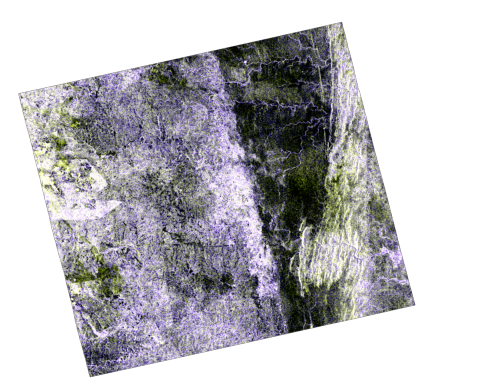

In [5]:

c2Folder =  os.path.join(inFile.split('.h5')[0],f"rlee_{window_size}x{window_size}",'C2HX')
# pst.dxpRGB(c2Folder,type=1)
# pst.dxpRGB(c2Folder,type=2)
# pst.dxpRGB(c2Folder,type=3)
pst.dxpRGB(c2Folder,type=4)

#### 4. Generating some polarimetric parameters from C2 matrix

##### 4.1 Barakat Degree of polarization 
##### using `polsartools.dopdp` function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DOP_dp.html) or run `print(polsartools.dopdp.__.doc__)`


In [6]:
pst.dop_dp(c2Folder)

Progress:   0%|          | 0/12 [00:00<?, ?block/s]

Progress:   8%|▊         | 1/12 [00:04<00:48,  4.40s/block]

Progress:  33%|███▎      | 4/12 [00:04<00:07,  1.13block/s]

Progress:  42%|████▏     | 5/12 [00:04<00:05,  1.39block/s]

Progress: 100%|██████████| 12/12 [00:04<00:00,  2.42block/s]

Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\dopdp.tif
Execution time for dop_dp: 6.00 seconds


##### Preview the output

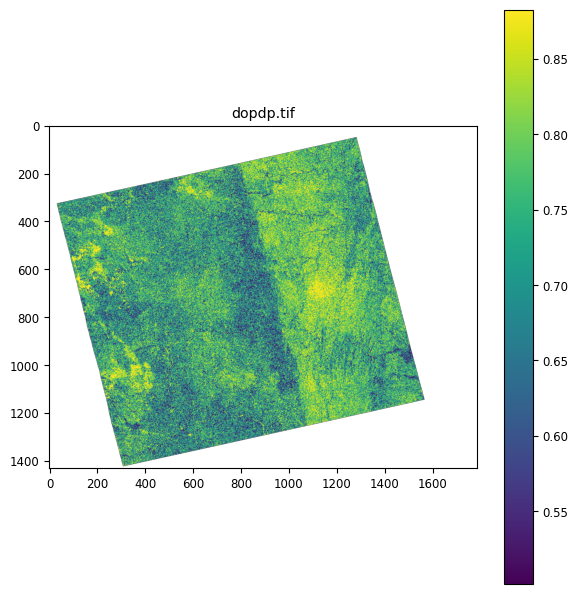

In [7]:

plot_images(c2Folder+'/dopdp.tif', lower_percentile=2, upper_percentile=98)

##### 4.2. Entropy-Alpha (H/α) parameters 
##### using **`polsartools.halphadp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halphadxp.html) or run `print(polsartools.halphadp.__.doc__)`


In [8]:
pst.halpha_dp(c2Folder)


Progress:   0%|          | 0/12 [00:00<?, ?block/s]

Progress:   8%|▊         | 1/12 [00:06<01:14,  6.78s/block]

Progress:  17%|█▋        | 2/12 [00:07<00:30,  3.06s/block]

Progress:  33%|███▎      | 4/12 [00:09<00:15,  1.92s/block]

Progress:  42%|████▏     | 5/12 [00:09<00:09,  1.39s/block]

Progress:  50%|█████     | 6/12 [00:10<00:06,  1.07s/block]

Progress:  58%|█████▊    | 7/12 [00:10<00:04,  1.24block/s]

Progress:  67%|██████▋   | 8/12 [00:10<00:02,  1.66block/s]

Progress:  75%|███████▌  | 9/12 [00:10<00:01,  1.88block/s]

Progress:  83%|████████▎ | 10/12 [00:11<00:00,  2.21block/s]

Progress:  92%|█████████▏| 11/12 [00:11<00:00,  2.55block/s]

Progress: 100%|██████████| 12/12 [00:11<00:00,  1.04block/s]

Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\Hdp.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\alphadp.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\e1_norm.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\e2_norm.tif
Execution time for halpha_dp: 13.00 seconds


##### Preview the output

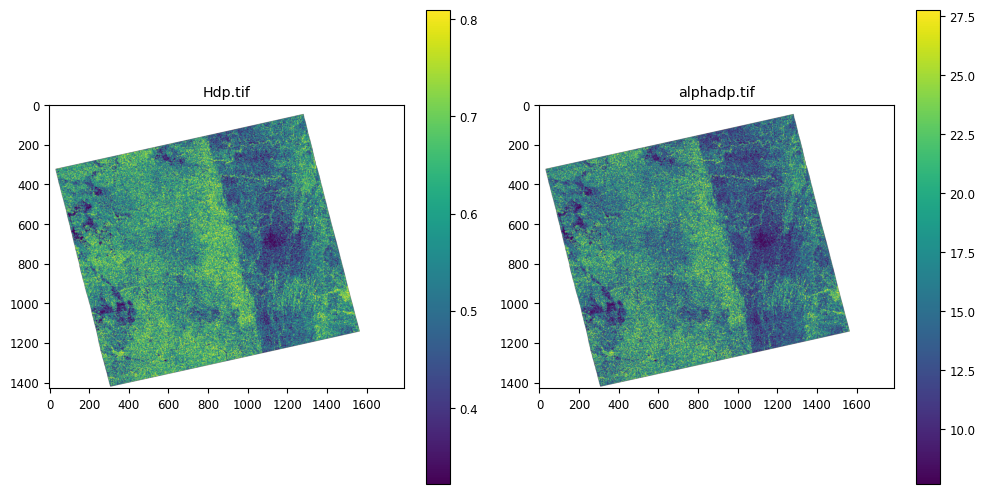

In [9]:


plot_images(c2Folder+'/Hdp.tif', 
            c2Folder + '/alphadp.tif',
            lower_percentile=2, upper_percentile=98)



##### Plot Entropy-Alpha plot for dual-pol
##### using **`polsartools.halpha_plot_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halpha_plot_dp.html) or run `print(polsartools.halpha_plot_dp.__.doc__)`

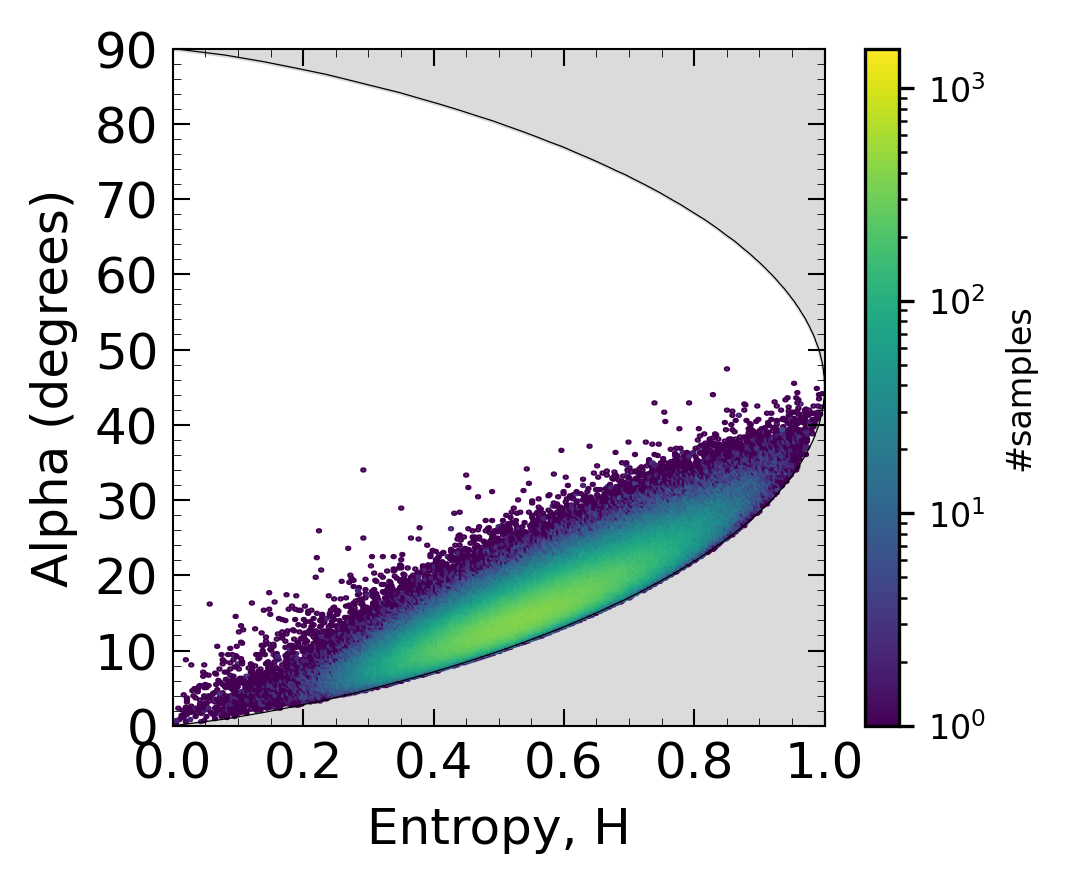

In [10]:
hFile = c2Folder + '/Hdp.tif'
alphaFile = c2Folder + '/alphadp.tif'

pst.halpha_plot_dp(hFile,alphaFile,norm='log')

##### 4.3. Shannon Entropy parameters (SE is the sum of contributions from intensity (SEI) and polarimetry (SEP))
##### using **`polsartools.shannon_h_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/shannon_h_dp.html) or run `print(polsartools.shannon_h_dp.__.doc__)`

In [11]:
pst.shannon_h_dp(c2Folder,win = 3)

Progress:   0%|          | 0/12 [00:00<?, ?block/s]

Progress:   8%|▊         | 1/12 [00:06<01:16,  6.96s/block]

Progress:  17%|█▋        | 2/12 [00:07<00:30,  3.04s/block]

Progress:  25%|██▌       | 3/12 [00:07<00:16,  1.82s/block]

Progress:  33%|███▎      | 4/12 [00:09<00:16,  2.01s/block]

Progress:  42%|████▏     | 5/12 [00:10<00:09,  1.34s/block]

Progress:  50%|█████     | 6/12 [00:10<00:05,  1.01block/s]

Progress:  67%|██████▋   | 8/12 [00:10<00:02,  1.60block/s]

Progress:  75%|███████▌  | 9/12 [00:11<00:01,  2.03block/s]

Progress:  83%|████████▎ | 10/12 [00:11<00:00,  2.44block/s]

Progress:  92%|█████████▏| 11/12 [00:11<00:00,  2.90block/s]

Progress: 100%|██████████| 12/12 [00:11<00:00,  3.32block/s]

Progress: 100%|██████████| 12/12 [00:11<00:00,  1.04block/s]

Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\H_Shannon.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\HI_Shannon.tif


Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\HP_Shannon.tif
Execution time for shannon_h_dp: 13.00 seconds


##### Preview the output

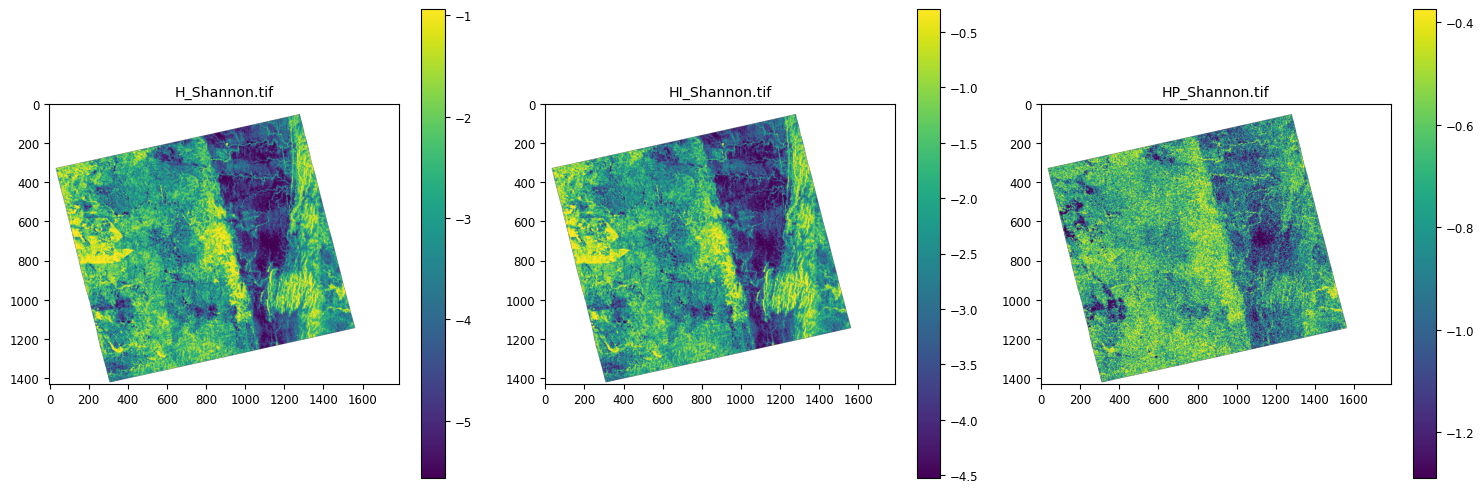

In [12]:

plot_images(c2Folder+'/H_Shannon.tif', 
            c2Folder + '/HI_Shannon.tif',
            c2Folder + '/HP_Shannon.tif',
            
            lower_percentile=2, upper_percentile=98)


##### 4.4. vegetation indices, Radar vegetation index (RVI), Dual-pol Radar Vegetation Index (DpRVI)

##### using **`polsartools.rvidp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/RVI_dp.html) or run `print(polsartools.rvidp.__.doc__)`

##### using **`polsartools.dprvi`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DpRVI.html) or run `print(polsartools.dprvi.__.doc__)`




In [13]:
pst.rvi_dp(c2Folder)

pst.dprvi(c2Folder)

Progress:   0%|          | 0/12 [00:00<?, ?block/s]

Progress:   8%|▊         | 1/12 [00:03<00:40,  3.70s/block]

Progress:  25%|██▌       | 3/12 [00:03<00:09,  1.01s/block]

Progress:  50%|█████     | 6/12 [00:04<00:02,  2.30block/s]

Progress:  75%|███████▌  | 9/12 [00:04<00:00,  4.01block/s]

Progress: 100%|██████████| 12/12 [00:04<00:00,  2.88block/s]

Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\rvidp.tif
Execution time for rvi_dp: 5.00 seconds


Progress:   0%|          | 0/12 [00:00<?, ?block/s]

Progress:   8%|▊         | 1/12 [00:03<00:43,  3.94s/block]

Progress:  42%|████▏     | 5/12 [00:04<00:04,  1.62block/s]

Progress:  75%|███████▌  | 9/12 [00:04<00:00,  3.40block/s]

Progress: 100%|██████████| 12/12 [00:04<00:00,  2.83block/s]

Saved file ../data/NISAR/GSLC_DP\rlee_3x3\C2HX\dprvi.tif
Execution time for dprvi: 5.00 seconds


##### Preview the output

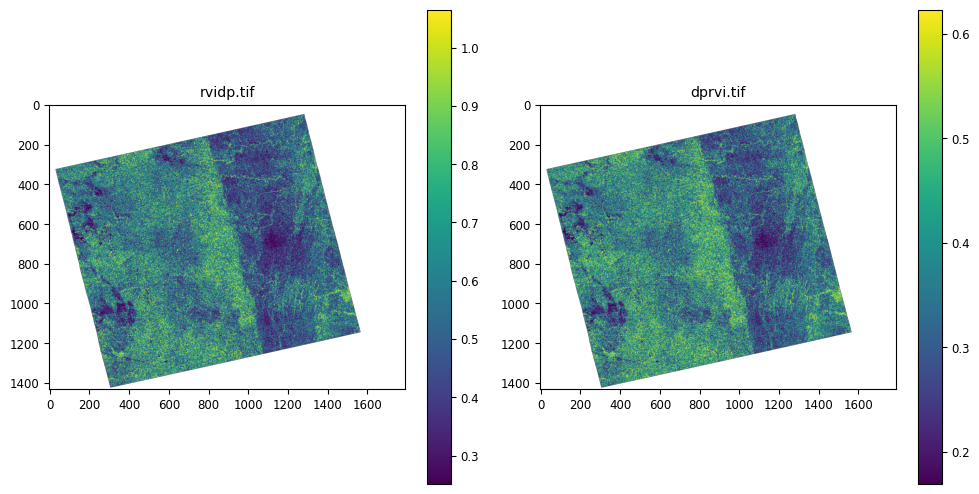

In [14]:

plot_images(c2Folder+'/rvidp.tif', 
            c2Folder + '/dprvi.tif',           
            lower_percentile=2, upper_percentile=98)
